In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone

In [2]:
response = requests.get("https://od.cdc.gov.tw/eic/NHI_Influenza_like_illness.json")
data_json = response.json()

In [3]:
influenza = []
for i in data_json:
    if (i["年"] == "2021") & (i["縣市"] == "桃園市"):
        data = [i["健保就診總人次"], i["就診類別"], i["年"], i["年齡別"], i["縣市"], i["週"], i["類流感健保就診人次"]]
        influenza.append(data)
        
df = pd.DataFrame(influenza, columns = ["健保就診總人次", "就診類別", "年", "年齡", "縣市", "週", "類流感健保就診人次"])
df["健保就診總人次"] = df["健保就診總人次"].astype(int)
df["類流感健保就診人次"] = df["類流感健保就診人次"].astype(int)

df["類流感健保就診人次比"] = round(df.iloc[:,6] / df.iloc[:,0], 4)
df

,健保就診總人次,就診類別,年,年齡,縣市,週,類流感健保就診人次,類流感健保就診人次比
0,189,住院,2021,0-4,桃園市,01,24,0.1270
1,186,住院,2021,15-24,桃園市,01,4,0.0215
2,2535,住院,2021,25-64,桃園市,01,33,0.0130
3,114,住院,2021,5-14,桃園市,01,13,0.1140
4,1683,住院,2021,65+,桃園市,01,86,0.0511
...,...,...,...,...,...,...,...,...
445,1317,門診,2021,0-4,桃園市,45,5,0.0038
446,619,門診,2021,15-24,桃園市,45,2,0.0032
447,4349,門診,2021,25-64,桃園市,45,7,0.0016
448,1248,門診,2021,5-14,桃園市,45,3,0.0024


## 輸出 CSV 檔

In [5]:
df.to_csv("歷年健保門診類流感就診人次.csv", encoding = 'utf_8_sig',index = False)

In [9]:
### 不區分年齡
df1 = df.groupby("週", as_index=False).mean()
df.groupby(["週", "年齡"], as_index=False).mean()

,週,年齡,健保就診總人次,類流感健保就診人次,類流感健保就診人次比
0,01,0-4,12920.0,262.5,0.07325
1,01,15-24,13059.5,64.0,0.01315
2,01,25-64,108975.5,369.5,0.00815
3,01,5-14,20620.5,260.0,0.06315
4,01,65+,49601.5,201.0,0.02715
...,...,...,...,...,...
220,45,0-4,660.0,2.5,0.00190
221,45,15-24,317.5,1.0,0.00160
222,45,25-64,2244.0,4.0,0.00440
223,45,5-14,624.5,1.5,0.00120


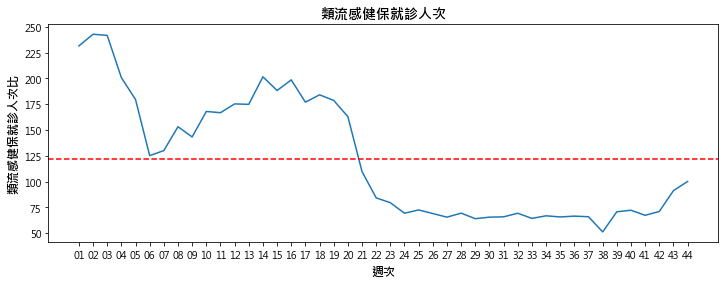

In [27]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字體
plt.rcParams['axes.unicode_minus'] = False                # 用來正常顯示負號
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(df1["週"], df1["類流感健保就診人次"])
plt.axhline(y=df1["類流感健保就診人次"].mean(), color = 'r', linestyle='--')

#plt.legend(labels=["類流感健保就診人次", "類流感健保就診人次比"], loc = 'best')
plt.xlabel("週次", fontweight = "bold", fontsize=12)                # 設定 x 軸標題及粗體
plt.ylabel("類流感健保就診人次比", fontweight = "bold", fontsize=12)  # 設定 y 軸標題及粗體
plt.title("類流感健保就診人次", fontsize = 14, fontweight = "bold")   # 設定標題、文字大小、粗體及位置
plt.show()

<AxesSubplot:xlabel='年齡', ylabel='類流感健保就診人次'>

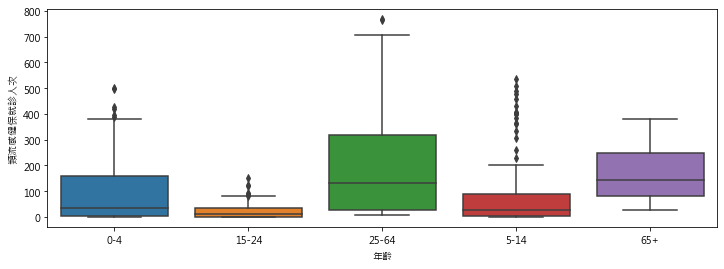

In [35]:
sns.boxplot(x = "年齡", y = "類流感健保就診人次", data = df)

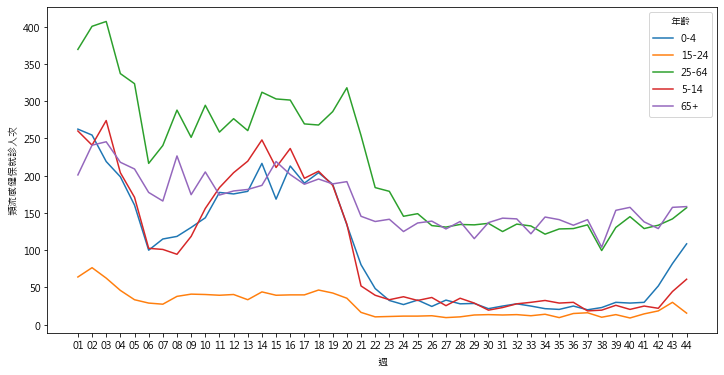

In [46]:
plt.rcParams["figure.figsize"] = (12,6)
sns.lineplot(x = "週", y = "類流感健保就診人次", data = df, hue = "年齡", ci = None);